The slowest run took 6.37 times longer than the fastest. This could mean that an intermediate result is being cached.
36 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


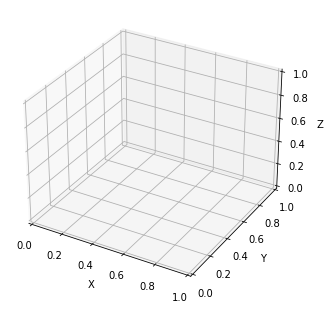

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from stl import mesh

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


r_roll =math.radians(0)
r_yaw =math.radians(0)
r_pitch =math.radians(0)
view_w=math.radians(36)
view_h=math.radians(27)
# 画像１
img1 = cv2.imread("test1.jpg")
# 画像２
img2 = cv2.imread("test2.jpg")

# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()

# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher(cv2.NORM_HAMMING)


# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.match(des1,des2)




def convert_3d(data):

    d=750/350*2.54/math.atan(view_h)
    d_from_center = math.sqrt((((data[0]-375)/350*2.54)**2)+(((data[1]-250)/350*2.54)**2))
    D=math.sqrt((d**2)+(d_from_center**2))
    if data[0]-375>0 and data[1]-250<0:#1
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch+r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw-r_y
    elif data[0]-375>0 and data[1]-250>0:#2
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch-r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw-r_y
    elif data[0]-375<0 and data[1]-250<0:#3
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch-r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw+r_y
    elif data[0]-375<0 and data[1]-250>0:#4
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch+r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw+r_y
    
    
    x=D*math.cos(all_pitch)*math.sin(all_yaw)
    y=D*math.cos(all_pitch)*math.cos(all_yaw)
    z=D*math.sin(all_pitch)
    return x,y,z
    

def convert(data):
    data_converted=[]
    for loc in data:
        data_converted.append(convert_3d(loc))
    coe = (data_converted[0][1]+0.6)/data_converted[1][1]
    
    return round(data_converted[1][0]*coe,5),round(data_converted[1][1]*coe,5),round(data_converted[1][2]*coe,5)

def collect(matches):
    polygon=[]
    for one in matches:
        n =[kp1[one.queryIdx].pt,kp2[one.queryIdx].pt]
        summit=convert(n)
        polygon.append(summit)
    poly=np.array(polygon).astype(float)
    return poly
    


%timeit x=collect(matches)

In [5]:
import numpy as np

a_1=np.array([-2,1])
a_2=np.array([1,1])

print(np.cross(a_1,a_2))

-3


45.7 ms ± 7.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


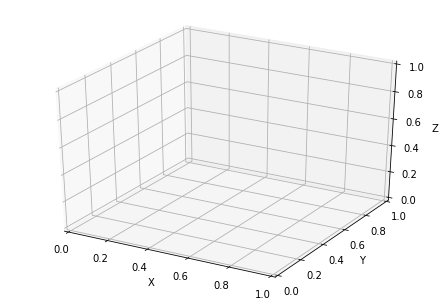

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import ptamlib

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")




r_roll =math.radians(0)
r_yaw =math.radians(0)
r_pitch =math.radians(0)
view_w=math.radians(36.17615)
view_h=math.radians(25.98925)
# 画像１
img1 = cv2.imread("test_1.jpg")
# 画像２
img2 = cv2.imread("test_2.jpg")


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()


# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher(cv2.NORM_HAMMING)


# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
match = bf.knnMatch(des1,des2,k=2)
ratio = 0.5
matches=[]
for m, n in match:
    if m.distance < ratio * n.distance:
        matches.append([m])

matches=np.array(matches).flatten().tolist()

%timeit ptamlib.collect(matches,kp1,kp2,view_w)


In [15]:
%%timeit
def test1(i):
    l=i-1
    return l

def test2(n):
    m=test1(n)*2
    return m

for p in range(10000):
    q=test2(p)


3.4 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
def test2(n):
    m=test1(n-1)*2
    return m

for p in range(10000):
    q=test2(p)


4 ms ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
import numpy as np
X=np.array([
    [1,2,3],
    [4,5,6]
])
print(X[:,0])

[1 4]


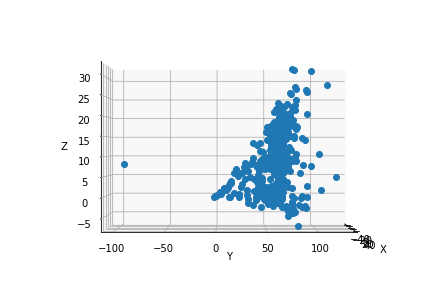

759 ms ± 135 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")




r_roll =math.radians(0)
r_yaw =math.radians(0)
r_pitch =math.radians(0)
view_w=math.radians(36.17615)
view_h=math.radians(25.98925)
range=0.35
# 画像１
img1 = cv2.imread("test_1.jpg")
# 画像２
img2 = cv2.imread("test_2.jpg")


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()


# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher(cv2.NORM_HAMMING)


# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
match = bf.knnMatch(des1,des2,k=2)
ratio = 0.25
matches=[]
for m, n in match:
    if m.distance < ratio * n.distance:
        matches.append([m])


matches=np.array(matches).flatten().tolist()

def convert_3d(data):
    d=375/math.tan(view_w)
    x=((data[0]-375))
    y=d
    z=((250-data[1]))
    
    return round(x,2),round(y,2),round(z,2)


def each_delta(a,b):
    A=np.array([
        [sum(a[:2]),sum(a[1:])],
        [sum(b[:2]),sum(b[1:])]
    ])
    R=np.array([
        [a[0],a[1],a[2]],
        [b[0],b[1],b[2]],
    ])
    alufa=np.cross(A[:,0],A[:,1])
    Right=np.matrix([
        [np.cross(A[:,1],R[:,0])-alufa,np.cross(A[:,1],R[:,0])+np.cross(A[:,0],R[:,0]),np.cross(A[:,0],R[:,0])],
        [np.cross(A[:,1],R[:,1]),np.cross(A[:,1],R[:,1])+np.cross(A[:,0],R[:,1])-alufa,np.cross(A[:,0],R[:,1])],
        [np.cross(A[:,1],R[:,2]),np.cross(A[:,1],R[:,2])+np.cross(A[:,0],R[:,2]),np.cross(A[:,0],R[:,2])-alufa]
    ])
    Left=np.matrix([
        [-1*(-0.6*np.cross(R[:,0],A[:,1])+0*np.cross(A[:,0],R[:,0])+0.6*alufa)],
        [-1*(-0.6*np.cross(R[:,1],A[:,1])+0*np.cross(A[:,0],R[:,1])-0*alufa)],
        [-1*(-0.6*np.cross(R[:,2],A[:,1])+0*np.cross(A[:,0],R[:,2])-0*alufa)],
    ])
    coe_delta = (np.linalg.pinv(Right)*Left).reshape(-1,).tolist()
    return (coe_delta[0][0],coe_delta[0][1],coe_delta[0][2])

def convert(data):
    data_converted=[]
    for loc in data:
        data_converted.append(convert_3d(loc))
    x,y,z=each_delta(data_converted[0],data_converted[1])
    A=np.matrix([
        [-1*sum(data_converted[1][:2]),sum(data_converted[0][:2])],
        [-1*sum(data_converted[1][1:]),sum(data_converted[0][1:])],
    ])
    if abs(x**2+y**2+z)<range:
        Y=np.matrix([
            [-0.6+x+y],
            [0+y+z],
        ])
    else:
        Y=np.matrix([
            [-0.6],
            [0],
        ])
    coe = np.linalg.solve(A,Y).reshape(-1,).tolist()
    
    return data_converted[1][0]*coe[0][0],data_converted[1][1]*coe[0][0],data_converted[1][2]*coe[0][0]

def collect(data):
    polygon=[]
    for one in matches:
        n =[kp1[one.queryIdx].pt,kp2[one.trainIdx].pt]
        summit=convert(n)
        polygon.append(summit)
    polygon=[i for i in polygon if i is not None]
    poly=np.array(polygon).astype(float)
    ax.plot(poly.T[0],poly.T[1],poly.T[2],marker="o",linestyle='None')
    ax.can_zoom()
    ax.view_init(elev=0, azim=0)
    plt.show()
    

%timeit collect(matches)